<a href="https://colab.research.google.com/github/Pavalya-Periyasamy05/Machine-Learning-and-AI/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### In cheminformatics, exploratory data analysis is referred to as chemical space analysis, where chemical compounds are represented as stars in a multidimensional space, and biologically active molecules cluster into constellations, with higher activity reflected by larger points in constellation plots.

## **Import library**

In [1]:
import seaborn as sns
sns.set(style="ticks")
import matplotlib.pyplot as plt

## **Frequency plot of the 2 bioactivity classes**

In [3]:
import pandas as pd
df_2classes = pd.read_csv("Bioactivity_2Classes_Data.csv")
df_2classes

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2396992,Cc1[nH]c2cc(Cl)cc(Cl)c2c1CCN,inactive,243.137,3.28432,2.0,1.0,3.809668
1,CHEMBL3218636,CCCC[C@H]1NC(=O)[C@@H](Cc2ccc3ccccc3c2)NC(=O)[...,inactive,1499.798,4.44247,13.0,15.0,5.000000
2,CHEMBL3218638,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H...,active,1452.703,-1.14759,19.0,17.0,6.698970
3,CHEMBL3218639,CC1(C)COC(=O)[C@H](Cc2ccccc2)NC(=O)[C@H](CCCNC...,inactive,1416.645,1.83787,13.0,16.0,5.000000
4,CHEMBL3218640,CC(C)C[C@@H]1NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](...,inactive,1276.500,1.45780,10.0,15.0,5.000000
...,...,...,...,...,...,...,...,...
2048,CHEMBL5969767,C=CC(=O)N1CC2(CC(n3nc(-c4ccc5c(cnn5CCO)c4)c(-c...,active,556.070,5.05514,2.0,7.0,7.744727
2049,CHEMBL5853151,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4C)c(-c4c(Cl)c(C...,active,522.987,6.04574,1.0,5.0,6.270835
2050,CHEMBL5966709,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4)c(-c4c(Cl)c(Cl...,active,529.378,6.08230,1.0,5.0,6.474955
2051,CHEMBL5285175,C=CC(=O)N1CC2(CC(n3nc(-c4cccnc4)c(-c4c(Cl)c(C)...,active,508.960,5.73732,1.0,5.0,6.093665


In [5]:
# sanity check
print(len(df_2classes))
print(df_2classes.index.min(),df_2classes.index.max() )


2053
0 2052


/tmp/ipython-input-2027941089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bioactivity_class", data=df_2classes, edgecolor="black", palette={"active": "#ff7f0e", "inactive": "#1f77b4"})


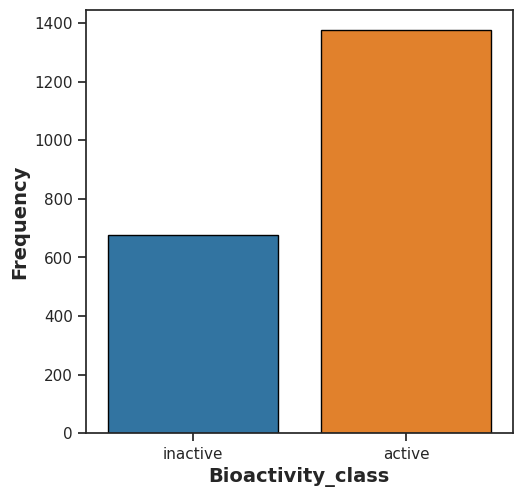

In [10]:
plt.figure(figsize=(5.5,5.5))
sns.countplot(x="bioactivity_class", data=df_2classes, edgecolor="black", palette={"active": "#ff7f0e", "inactive": "#1f77b4"})
plt.xlabel("Bioactivity_class", fontsize=14, fontweight="bold")
plt.ylabel("Frequency", fontsize=14, fontweight="bold")

plt.savefig("plot_bioactivity_class.pdf")


## **Scatter plot of Molecular Weight versus LogP**

### It can be seen that the 2 bioactivity classes are spinning similar chemical spaces are evident by the scatter plot of MW vs LogP

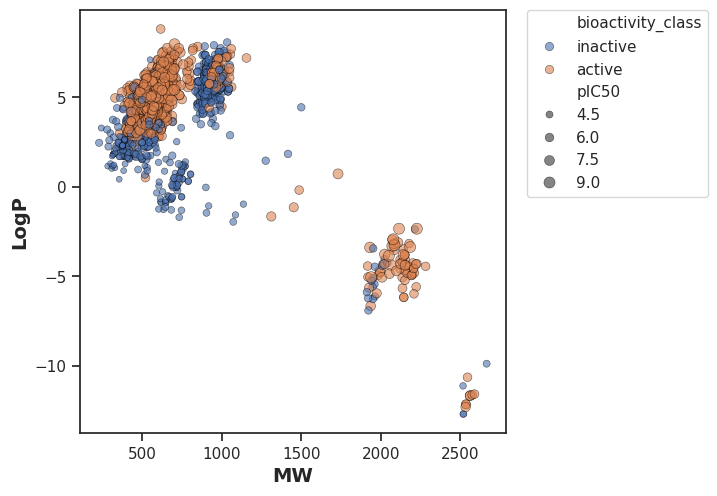

In [13]:
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(x="MW",y="LogP", data=df_2classes, hue="bioactivity_class", size="pIC50", edgecolor="black", alpha=0.6) # hue: color

plt.xlabel("MW", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0) # opted to have outside the plot
plt.savefig("plot_MW_vs_LogP.pdf")

## **Box plots**

## **pIC50**
## Used threshold 5 and 6 to define active and inacive

   *   pIC5O value greater than 6 will be **active**
   *   pIC5O value less than 5 will be **inactive**



/tmp/ipython-input-2243817156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y="pIC50", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})


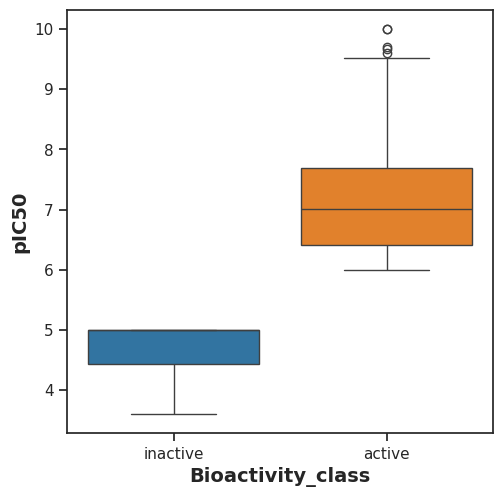

In [16]:

plt.figure(figsize=(5.5,5.5))

sns.boxplot(x="bioactivity_class", y="pIC50", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})

plt.xlabel("Bioactivity_class", fontsize=14, fontweight= "bold")
plt.ylabel("pIC50", fontsize=14, fontweight="bold")

plt.savefig("plot_ic50.pdf")

## **Statistical analysis: Mann-Whitney U Test**

### To find significant differences between active and inactive groups

In [24]:
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection =[descriptor, "bioactivity_class"]
  df =df_2classes[selection]
  active =df[df.bioactivity_class == "active"]
  active= active[descriptor]

  selection =[descriptor, "bioactivity_class"]
  df = df_2classes[selection]
  inactive =df[df.bioactivity_class == "inactive"]
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  # print("statistical=%.3f, p=%.3f" % (stat,p))

# Interpret
  alpha = 0.05
  if p > alpha:
     interpretation = "Same distribution (fail to reject H0)"
  else:
    interpretation="Different distribution (reject H0)"

  results = pd.DataFrame({ "Descriptors": descriptor,
                            "Statistics": stat,
                            "p": p,
                            "alpha": alpha,
                            "Interpretation": interpretation}, index=[0])

  filename = "mannwhitneyu_" + descriptor + ".csv"
  results.to_csv(filename)

  return results

In [25]:
mannwhitney("pIC50")

,Descriptors,Statistics,p,alpha,Interpretation
0,pIC50,931552.0,2.176481e-299,0.05,Different distribution (reject H0)


## **MW**

/tmp/ipython-input-2206835207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y="MW", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})


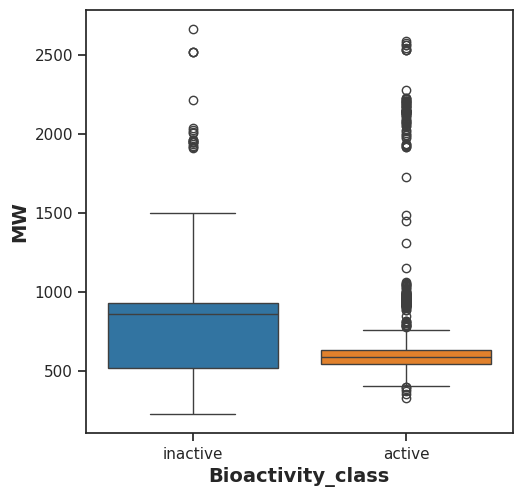

In [26]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x="bioactivity_class", y="MW", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})

plt.xlabel("Bioactivity_class", fontsize=14, fontweight= "bold")
plt.ylabel("MW", fontsize=14, fontweight="bold")

plt.savefig("plot_MW.pdf")

In [27]:
mannwhitney("MW")

,Descriptors,Statistics,p,alpha,Interpretation
0,MW,365382.5,1.858684e-15,0.05,Different distribution (reject H0)


## **LogP**

/tmp/ipython-input-2476601896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y="LogP", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})


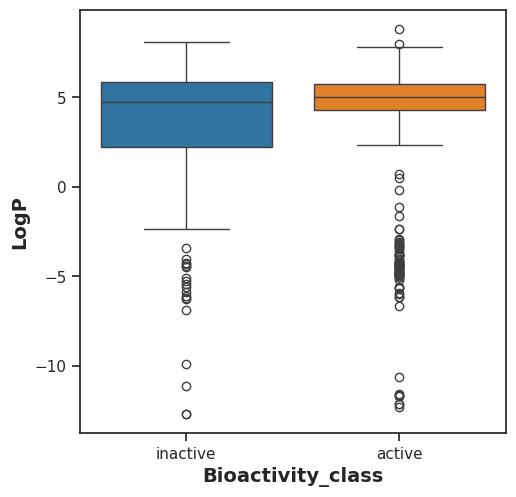

In [28]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x="bioactivity_class", y="LogP", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})

plt.xlabel("Bioactivity_class", fontsize=14, fontweight= "bold")
plt.ylabel("LogP", fontsize=14, fontweight="bold")

plt.savefig("plot_logP.pdf")

In [29]:
mannwhitney("LogP")

,Descriptors,Statistics,p,alpha,Interpretation
0,LogP,532439.5,1.297174e-07,0.05,Different distribution (reject H0)


## **NumHDonors**

/tmp/ipython-input-3321563624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y="NumHDonors", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})


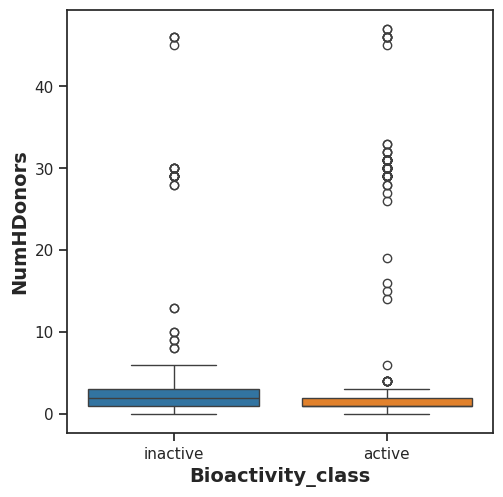

In [30]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x="bioactivity_class", y="NumHDonors", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})

plt.xlabel("Bioactivity_class", fontsize=14, fontweight= "bold")
plt.ylabel("NumHDonors", fontsize=14, fontweight="bold")

plt.savefig("plot_NumHDonors.pdf")

In [31]:
mannwhitney("NumHDonors")

,Descriptors,Statistics,p,alpha,Interpretation
0,NumHDonors,280522.0,8.092325e-53,0.05,Different distribution (reject H0)


## **NumHAcceptors**

/tmp/ipython-input-3549426944.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="bioactivity_class", y="NumHAcceptors", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})


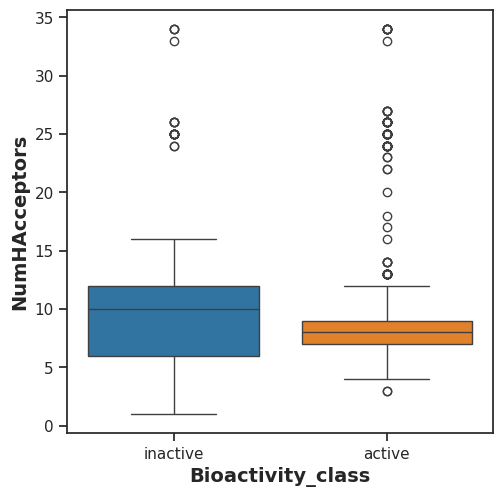

In [32]:
plt.figure(figsize=(5.5,5.5))

sns.boxplot(x="bioactivity_class", y="NumHAcceptors", data=df_2classes, palette= {"active":"#ff7f0e", "inactive":"#1f77b4"})

plt.xlabel("Bioactivity_class", fontsize=14, fontweight= "bold")
plt.ylabel("NumHAcceptors", fontsize=14, fontweight="bold")

plt.savefig("plot_NumHAcceptors.pdf")

In [33]:
mannwhitney("NumHAcceptors")

,Descriptors,Statistics,p,alpha,Interpretation
0,NumHAcceptors,370499.0,2.658732e-14,0.05,Different distribution (reject H0)


## **Interpretation of Statistical Analysis**

## **pIC50**

### Taking a look at pIC50 values, the **actives** and **inactives** displayed **statistically significant differnces**, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

## **Lipinski's descriptors**

### All the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) shows **statistically significant difference** between **actives **and **inactives**

### Unlike pIC50, these descriptors were not used to define bioactivity classes, suggesting that they are genuinely associated with bioactivity rather than reflecting a classification artefact.

## **Zip files**

In [37]:
! zip -r results.zip . -i "*.csv" "*.pdf"


  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: plot_logP.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_pIC50.csv (deflated 11%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: Bioactivity_2Classes_Data.csv (deflated 84%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: sample_data/california_housing_test.csv (deflated 76%)
  adding: sample_data/mnist_test.csv (deflated 88%)
  adding: sample_data/mnist_train_small.csv (deflated 88%)
  adding: sample_data/california_housing_train.csv (deflated 79%)


In [35]:
! ls *.csv
! ls *.pdf


Bioactivity_2Classes_Data.csv  mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_LogP.csv	       mannwhitneyu_NumHDonors.csv
mannwhitneyu_MW.csv	       mannwhitneyu_pIC50.csv
plot_bioactivity_class.pdf  plot_MW.pdf		    plot_NumHDonors.pdf
plot_ic50.pdf		    plot_MW_vs_LogP.pdf
plot_logP.pdf		    plot_NumHAcceptors.pdf
